In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pairtrader import *

In [2]:
close = pd.read_csv('data/crypto_1m.csv', index_col='unix') # reads the closing prices of 129 stocks from the energy sector
close.shape # N closing prices, 17 different symbols

(248925, 17)

In [3]:
# choose a pair; refer to our heatmap to choose a cointegrated pair
# use 48 hours; first 24 for model fit, last 24 for model test
# Order matters slightly! Ideally order by how regression for adf test was ordered.
X = close['trx'][-60*24*2:]
Y = close['ada'][-60*24*2:]

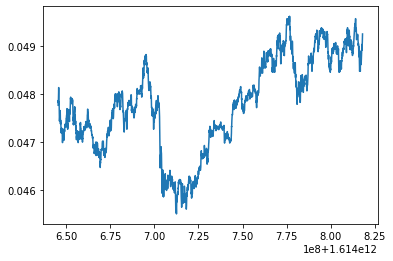

In [4]:
plt.plot(X)

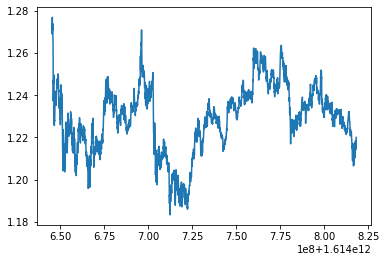

In [5]:
plt.plot(Y)

In [6]:
# params
z_crit = 2.5
z_sl = .5
z_tp = .5
window = 60
trade_size = 10000
trainval_split = len(X)//2
# first half of split meets model assumptions by adf test (reject unit root = 1)
# first half of split is training set used to fit Y ~ X
# second half of split is validation set where trading occurs

In [7]:
pt = PairTrader(X, Y, z_crit, z_sl, z_tp, trainval_split, window, trade_size)

In [8]:
pt.fit_model()

In [9]:
account, logs = pt.test_model()

In [10]:
print('Cash Balance:', account.cash_balance)
print('Asset Balance:', account.asset_balance)
print('Total Balance:', account.total_balance)
print('Open Positions:', account.positions)
longs = [i[0] for i in logs if i[1] == 'L']
shorts = [i[0] for i in logs if i[1] == 'S']
stop_loss = [i[0] for i in logs if i[1] == 'SL']
take_profit = [i[0] for i in logs if i[1] == 'TP']
print('Losses:', len(stop_loss))
print('Profits:', len(take_profit))

Cash Balance: 10128.52912126715
Asset Balance: 0
Total Balance: 10128.52912126715
Open Positions: {}
Losses: 12
Profits: 12


In [11]:
print('Logs:')
for i in logs:
    print(i)

Logs:
(1596, 'L', {'spread': 0.3182960152875838, 'stoploss': 0.3174709161415142, 'takeprofit': 0.319296902259048})
(1598, 'SL', 0.3174560152875838)
(1720, 'L', {'spread': 0.31310254387791536, 'stoploss': 0.31272460420568543, 'takeprofit': 0.3146664890273147})
(1721, 'SL', 0.31221737999284804)
(1722, 'L', {'spread': 0.31258415591622635, 'stoploss': 0.3116453014361695, 'takeprofit': 0.31386269610025636})
(1729, 'TP', 0.3143041559162265)
(1799, 'S', {'spread': 0.32293899203115917, 'stoploss': 0.32276699098494954, 'takeprofit': 0.32123617541642135})
(1801, 'SL', 0.3232009318396045)
(1802, 'S', {'spread': 0.32369093183960485, 'stoploss': 0.3239955269605207, 'takeprofit': 0.3221435350012862})
(1803, 'TP', 0.3218022161077807)
(1811, 'S', {'spread': 0.32650576795453723, 'stoploss': 0.326013386929992, 'takeprofit': 0.32383192158374885})
(1812, 'SL', 0.32619415591622647)
(1813, 'S', {'spread': 0.32713833649088975, 'stoploss': 0.32723343146006034, 'takeprofit': 0.3247535197215907})
(1814, 'TP', 0

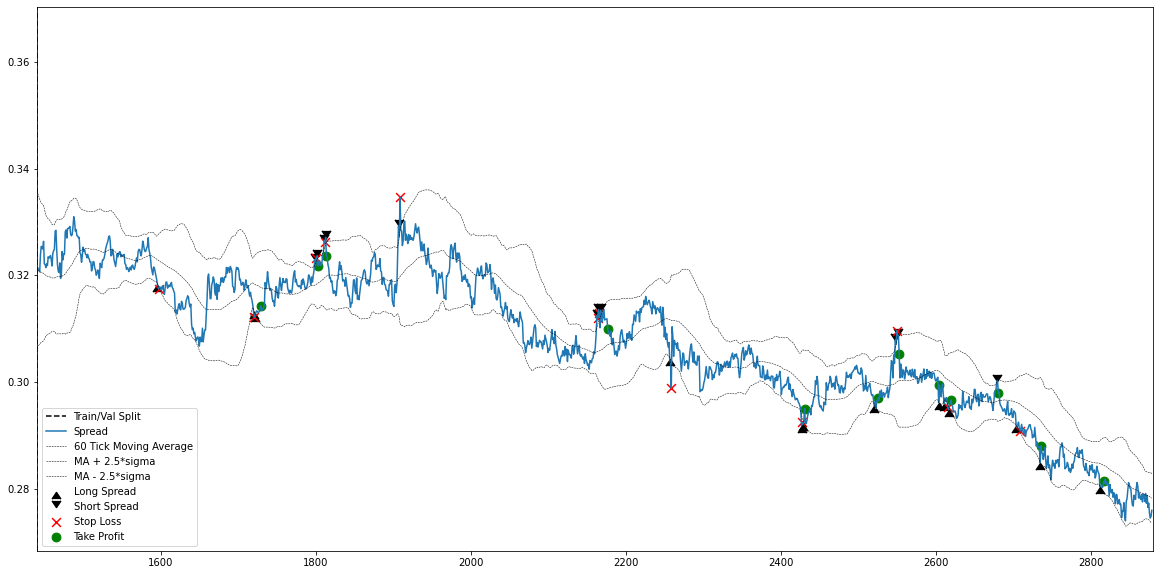

In [12]:
spread_plot = pt.plot('spread', zoom=True)

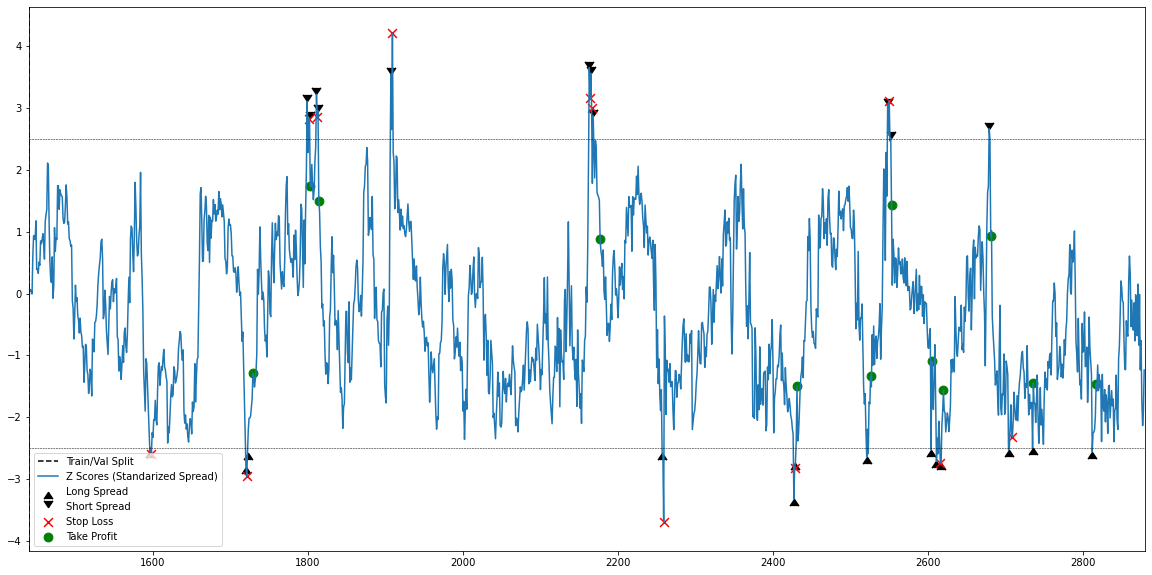

In [13]:
z_plot = pt.plot('z', zoom=True)